In [2]:
import sys
import json
import itertools
import collections
import pandas as pd

sys.path.append('../')
from const import *

FILE = '../new_comic_dict.json'

with open(FILE, 'r', encoding='utf-8') as fp:
    data = json.load(fp)

In [3]:
TITLE = '黒子のバスケ'
data[TITLE]

{'anime': True,
 'artist': ['藤巻忠俊'],
 'genre': '少年漫画',
 'magazine': '週刊少年ジャンプ',
 'new_theme': ['学園', '人間ドラマ', 'スポーツ'],
 'person_type': [],
 'review': 4.3,
 'situation': [],
 'story': '火神大我が入学先の誠凛高校バスケ部で出会ったのは、黒子テツヤという超地味な少年。存在感も無さ過ぎる黒子に幻滅する火神だったが、実は彼は「キセキの世代」と言われた伝説の最強チームのメンバーで…!?',
 'theme': ['バスケットボール', '学園', 'スポーツ', '友情・仲間'],
 'year': '2008'}

In [48]:
TITLE1 = '群青戦記 グンジョーセンキ'
# TITLE1 = '死役所'

print(data[TITLE1]['theme'])

for title in data:

    a = set(data[TITLE1]['theme'])
    b = set(data[title]['theme'])

    if len(a) > 3:
        if len(a & b) >= 4 and TITLE1 != title:
            print(title)
    else:
        if len(a & b) == len(a) and data[TITLE1]['genre'] == data[title]['genre'] and title != TITLE1:
            print(title)

['タイムスリップ', 'サバイバル', '時代物', 'スポーツ', 'ダーク', '学園']


In [67]:
import numpy as np

counter = collections.Counter([data[t]['year'] for t in data])
lst = []
for i in range(2000, 2017):
    lst.append(counter[str(i)])
    
a = np.array(lst, dtype=float)
weight = a / a.sum()
weight

array([ 0.05106383,  0.05531915,  0.06382979,  0.07659574,  0.05957447,
        0.03829787,  0.09361702,  0.08510638,  0.08085106,  0.07234043,
        0.05531915,  0.06382979,  0.06382979,  0.07234043,  0.05106383,
        0.00851064,  0.00851064])

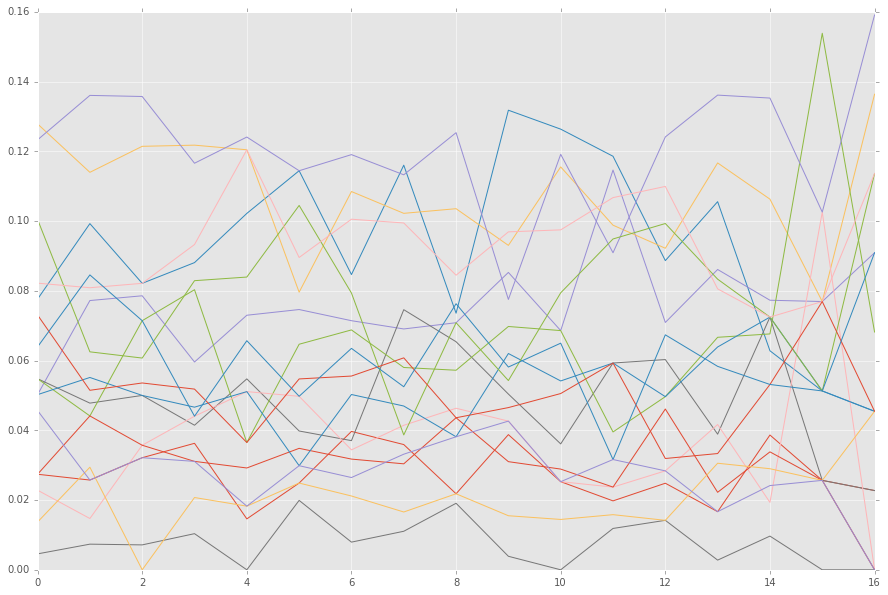

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(15, 10))

mtx = np.zeros([17, 17])
cvt = {th: i for i, th in enumerate(NEW_THEME)}

genre = '青年漫画'

for title in data:
    if data[title]['genre'] == genre:
        year = data[title]['year']
        if year is not None and int(year) >= 2000:
            r =  int(year) - 2000
        else:
            r = np.random.choice(list(range(2000, 2017)), p=weight) - 2000
        for th in data[title]['new_theme']:
            c = cvt[th]
            mtx[c][r] += 1
        
for i in range(17):
    mtx.T[i] /= mtx.T[i].sum()
    

plt.plot(mtx.T)

In [101]:
import re

title = '群青戦記'

for t in data:
    if re.search(title, t):
        print(t)


群青戦記 グンジョーセンキ


In [104]:
theme1 = 'ダーク'
theme2 = '学園'
# theme3 = 'スポーツ'
 

a = set([theme1, theme2, theme3])
for t in data:
    b = set(data[t]['new_theme'])
    if len(a & b) == len(a):
        print(t)